In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

s_p_500_data = '^GSPC.csv'
individual_data = 'all_stocks_5yr.csv'
individual_industry = '../s-and-p-500-companies-financials-master/data/constituents.csv'

s_p_df = pd.read_csv(s_p_500_data)
individual_df = pd.read_csv(individual_data)
industry_df = pd.read_csv(individual_industry)

In [2]:
individual_df.rename(columns = {'Name':'Symbol'}, inplace=True)

In [3]:
stocks_df = individual_df.merge(industry_df, on='Symbol')

In [4]:
stocks_df['Daily Change'] = stocks_df['open'] - stocks_df['close']
max_value = stocks_df['Daily Change'].max()
max_day_profit = stocks_df.loc[(stocks_df['Daily Change']==max_value)]
max_day_profit

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
441257,2017-11-07,1746.7,1748.0,1638.1,1645.72,3325104,PCLN,Priceline.com Inc,Consumer Discretionary,100.98


In [5]:
group_by_individual = stocks_df.groupby('Symbol')
max_by_group_symbol = group_by_individual['Daily Change'].max()
max_daily_each = pd.DataFrame({'Max Increase': max_by_group_symbol})
max_daily_each = max_daily_each.reset_index()

In [6]:
m = max_daily_each.loc[max_daily_each['Symbol']=='PCLN']
m

,Symbol,Max Increase
360,PCLN,100.98


In [7]:
top_10_max = max_daily_each.sort_values('Max Increase', ascending=False).head(10)
top_10_max

,Symbol,Max Increase
360,PCLN,100.98
105,CMG,75.81
38,AMZN,55.00
206,GOOG,43.27
393,REGN,38.57
207,GOOGL,38.22
69,BIIB,36.47
58,AZO,34.24
26,ALGN,32.03
325,MTD,30.84


In [8]:
min_value = stocks_df['Daily Change'].min()
min_day_profit = stocks_df.loc[(stocks_df['Daily Change']==min_value)]
min_day_profit

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
47644,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,Amazon.com Inc,Consumer Discretionary,-81.38


In [9]:
min_by_group_symbol = group_by_individual['Daily Change'].min()
min_daily_each = pd.DataFrame({'Min Increase': min_by_group_symbol})
min_daily_each = min_daily_each.reset_index()
m2 = min_daily_each.loc[min_daily_each['Symbol']=='AMZN']
m2

,Symbol,Min Increase
38,AMZN,-81.38


In [10]:
top_10_min = min_daily_each.sort_values('Min Increase', ascending=True).head(10)
top_10_min

,Symbol,Min Increase
38,AMZN,-81.38
360,PCLN,-58.65
206,GOOG,-53.42
207,GOOGL,-50.45
239,HUM,-36.03
105,CMG,-34.92
393,REGN,-33.07
379,PRGO,-30.30
58,AZO,-27.72
69,BIIB,-27.23


Text(0.5, 1.0, 'S&P 500')

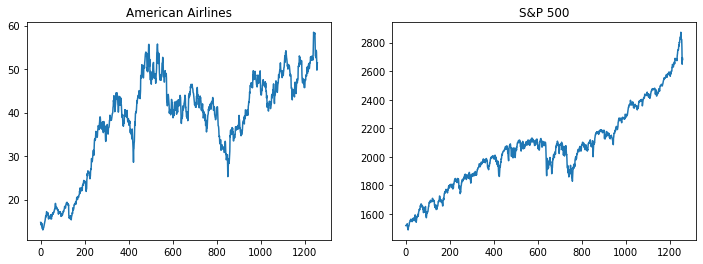

In [11]:
AAL_data = individual_df[individual_df['Symbol']=='AAL']
AAL_data

x_axis= np.arange(len(AAL_data))

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x_axis, AAL_data['close'])
ax1.set_title('American Airlines')

ax2=fig.add_subplot(1,2,2)
ax2.plot(x_axis, s_p_df['Close'])
ax2.set_title('S&P 500')

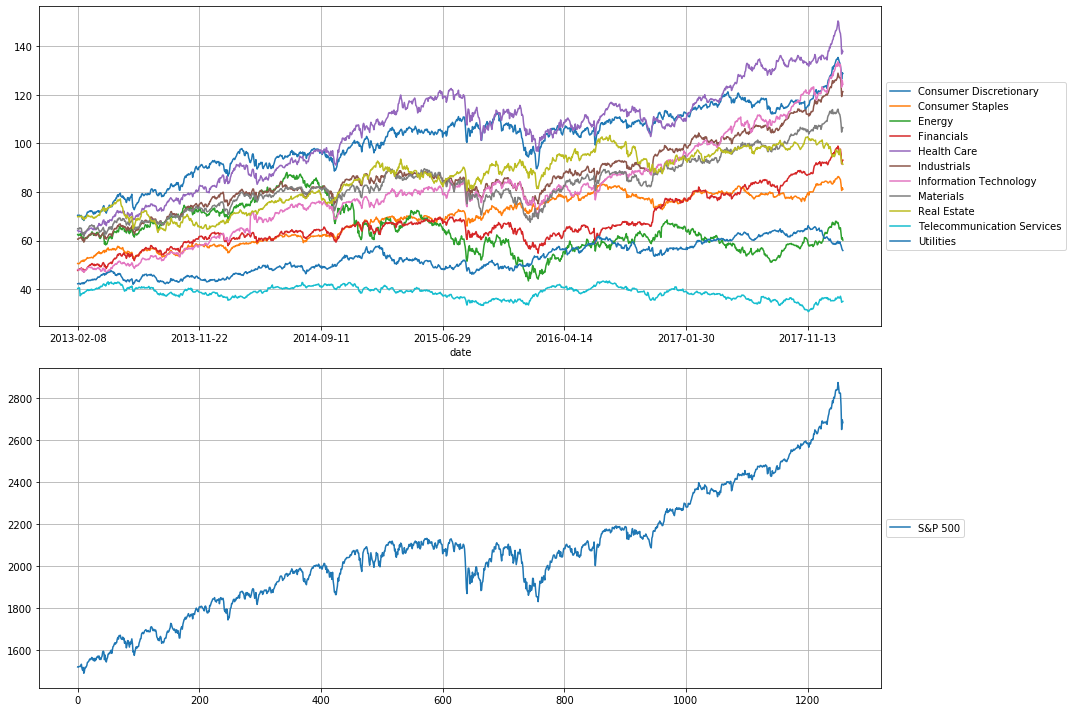

In [16]:
sector_df = stocks_df.groupby(['Sector','date'])['close'].mean()

sector = pd.DataFrame(sector_df)
sector = sector.unstack(level=0)
sector.columns = sector.columns.droplevel()
sector

#axis = np.arange(len(sector))
fig = plt.figure(figsize = (15,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sector.plot(ax=ax1)
ax2.plot(x_axis, s_p_df['Close'], label="S&P 500")

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax1.grid()
ax2.grid()
plt.tight_layout()

In [65]:
s_p = pd.DataFrame({'date': s_p_df['Date'],
                   'close':s_p_df['Close']})

ticker_df = stocks_df.groupby(['Symbol','date'])['close'].mean()
ticker = pd.DataFrame(ticker_df)
ticker = ticker.unstack(level=0)
ticker.columns = ticker.columns.droplevel()
ticker = ticker.reset_index()
ticker

merge_w_s_p_500 = ticker.merge(s_p, on='date')
merge_w_s_p_500.rename(columns={'close':'S&P'}, inplace=True)

#ticker.corr()
#ticker.merge(s_p_df['Close'], on='date')

#fig = plt.figure(figsize = (15,20))
#ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)

#ticker.plot(ax=ax1)
#ax2.plot(x_axis, s_p_df['Close'], label="S&P 500")

#ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#ax1.grid()

#plt.scatter(ticker['IBM'], s_p_df['Close'])
#np.corrcoef(ticker, s_p_df['Close'])

merge_w_s_p_500.corr()

merge_w_s_p_500['S&P']

0       1517.930054
1       1517.010010
2       1519.430054
3       1520.329956
4       1521.380005
           ...     
1254    2821.979980
1255    2762.129883
1256    2648.939941
1257    2695.139893
1258    2681.659912
Name: S&P, Length: 1259, dtype: float64

In [55]:
stocks_df_df = pd.DataFrame({'open':ticker_df})
stocks_df_df

open
Symbol date             
A      2013-02-08  45.08
       2013-02-11  44.60
       2013-02-12  44.62
       2013-02-13  44.75
       2013-02-14  44.58
...                  ...
ZTS    2018-02-01  77.82
       2018-02-02  76.78
       2018-02-05  73.83
       2018-02-06  73.27
       2018-02-07  73.86

[619040 rows x 1 columns]

In [49]:
s_p_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-02-08,1509.390015,1518.310059,1509.390015,1517.930054,1517.930054,2986150000
1,2013-02-11,1517.930054,1518.310059,1513.609985,1517.010010,1517.010010,2684100000
2,2013-02-12,1517.010010,1522.290039,1515.609985,1519.430054,1519.430054,3414370000
3,2013-02-13,1519.430054,1524.689941,1515.930054,1520.329956,1520.329956,3385880000
4,2013-02-14,1520.329956,1523.140015,1514.020020,1521.380005,1521.380005,3759740000
...,...,...,...,...,...,...,...
1254,2018-02-01,2816.449951,2835.959961,2812.699951,2821.979980,2821.979980,3938450000
1255,2018-02-02,2808.919922,2808.919922,2759.969971,2762.129883,2762.129883,4301130000
1256,2018-02-05,2741.060059,2763.389893,2638.169922,2648.939941,2648.939941,5283460000
1257,2018-02-06,2614.780029,2701.040039,2593.070068,2695.139893,2695.139893,5891660000


In [56]:
stocks_df

,date,open,high,low,close,volume,Symbol,Name,Sector,Daily Change
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Industrials,0.32
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Industrials,0.43
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Industrials,0.18
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Industrials,-0.36
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Industrials,0.95
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,Zoetis,Health Care,-0.98
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,Zoetis,Health Care,0.75
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,Zoetis,Health Care,2.81
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,Zoetis,Health Care,-0.53
